# Homework 3

## by Dion Ho


# Import Python Libraries

In [1]:
import numpy as np
import math
import scipy.sparse as sp
from math import pi
from math import factorial
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
%matplotlib inline

## Q3(a)

$u'' = -\pi^2\sin(\pi x) \implies u(x) = D + Cx + \sin(\pi x)$. Since $u(0) = 0$, $D = 0$. Since $u(1) = 1$, $1 = D + C \implies C = 1$. Therefore, $u(x) = x + \sin(\pi x)$.

## Q3(b)

Suppose that $u''(x) = au(x-h) + bu(x) +cu(x+h)$. We will Taylor expand $u(x-h)$ and $u(x+h)$ at point $x$.

\begin{align*}
au(x-h) &= a\left(u(x) + u'(x)(x-h-x) + \frac{u''(x)}{2!}(x-h-x)^2 + \frac{u^{(3)}(x)}{3!}(x-h-x)^3 + \frac{u^{(4)}(\xi_1)}{3!}(x-h-x)^4\right) \\
&= a\left(u(x) - u'(x)h + \frac{u''(x)}{2!}h^2 - \frac{u^{(3)}(x)}{3!}h^3 + \frac{u^{(4)}(\xi_1)}{3!}h^4\right)
\end{align*}
\begin{align*}
cu(x+h) &= c\left(u(x) + u'(x)(x+h-x) + \frac{u''(x)}{2!}(x+h-x)^2 + \frac{u^{(3)}(x)}{3!}(x+h-x)^3 + \frac{u^{(4)}(\xi_2)}{3!}(x+h-x)^4\right) \\
&= c\left(u(x) + u'(x)h + \frac{u''(x)}{2!}h^2 + \frac{u^{(3)}(x)}{3!}h^3 + \frac{u^{(4)}(\xi_2)}{3!}h^4\right)
\end{align*}
Therefore,
$$u''(x) = (a+b+c)u(x) + (c-a)u'(x)h + (a+c)\frac{u''(x)}{2!}h^2 + (c-a)\frac{u^{(3)}(x)}{3!}h^3 + (c+a)\mathcal{O}(h^4).$$
By comparing coefficients, $\displaystyle a+b+c=0, c-a=0, (a+c)\frac{h^2}{2!}=1$. Therefore, 
$$c = a = \frac{1}{h^2}, \hspace{1pc} b = -2a = -\frac{2}{h^2}.$$
Since $\displaystyle(c+a)\mathcal{O}(h^4) = \frac{2}{h^2}\mathcal{O}(h^4) = \mathcal{O}(h^2)$, the order of the method is $\mathcal{O}(h^2)$.

## Q3(c)

We will cast the problem into the from $A\vec{U} = \vec{G}$ using the finite difference formula,
$$u''(x) = \frac{1}{h^2}u(x-h) - \frac{2}{h^2}u(x) + \frac{1}{h^2}u(x+h).$$

$$\therefore A = \frac{1}{h^2}\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & 0 & 0 & \ldots & 0 & 0 & 0\\
 1 & -2 & 1 & 0 & 0 & \ldots & 0 & 0 & 0\\
 0 & 1 & -2 & 1 & 0 & \ldots & 0 & 0 & 0\\
 \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
 0 & 0 & 0 & 0 & 0 &\ldots & 1 & -2 & 1 \\
 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 1 & -2
 \end{array} \right) \hspace{2pc}
 \vec{U} = \left(
 \begin{array}{c}
 u(x_1) \\
 u(x_2) \\
 \vdots \\
 u(x_n)
 \end{array} \right) \hspace{2pc}
 \vec{G} = \left(
 \begin{array}{c}
 u''(x_1) - \displaystyle \frac{1}{h^2}u(x_0) \\
 u''(x_2) \\
 \vdots \\
 u''(x_{n-1}) \\
 u''(x_n) - \displaystyle \frac{1}{h^2}u(x_{n+1})
 \end{array} \right)$$

## Q3(d)

In [2]:
def solve_for_U(xvals,upp):
    h = xvals[2:]-xvals[1:-1] #h_j := x_{j+1} - x_j.
                              #h_j's definition results in x_0 being ignored, whereas x_n is used to calculated h_{n-1}.
                              #The answer did specify a formula for h, but this definition is more flexible (allows for non-equispaced points).
    d0 = -2*(1/h**2)
    d1 = 1/h[1:]**2
    dm1 = 1/h[0:-1]**2
    # create the "A" matrix by using the np.diag command
    A = sp.diags(d0) + sp.diags(d1,1)+ sp.diags(dm1,-1)
    
    # create the "b" matrix by applying the function to x_i.
    uppvals = np.hstack([upp(xvals[1:-2]),upp(xvals[-2])-1/(h[-2]**2)])
    # Ax = b, solve for x.
    uvals = spsolve(A,uppvals) #I'm using scipy sparse matrice solver else I'll run into memory problems later.
    
    return uvals

In [3]:
def solve_for_Un(xvals,upp):
    h = xvals[2:]-xvals[1:-1] #h_j := x_{j+1} - x_j.
                              #h_j's definition results in x_0 being ignored, whereas x_n is used to calculated h_{n-1}.
                              #The answer did specify a formula for h, but this definition is more flexible (allows for non-equispaced points).
    d0 = -2*(1/h**2)
    d1 = 1/h[1:]**2
    dm1 = 1/h[0:-1]**2
    # create the "A" matrix by using the np.diag command
    A = np.diag(d0) + np.diag(d1,1)+ np.diag(dm1,-1)
    
    # create the "b" matrix by applying the function to x_i.
    uppvals = np.hstack([upp(xvals[1:-2]),upp(xvals[-2])-1/(h[-2]**2)])
    # Ax = b, solve for x.
    uvals = np.linalg.solve(A,uppvals) #This may result in memory errors later.
    
    return uvals

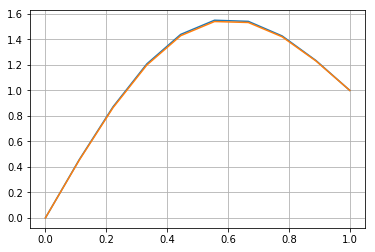

In [4]:
u_0, u_n = 0, 1 #Boundary conditions
upp = lambda x: -(np.pi**2)*np.sin(np.pi*x)
xvals = np.linspace(0,1,10) #xvals includes x_0 for grpahing purposes, but x_0 is not used in the function.

incomplete_yvals = solve_for_U(xvals,upp) #This is an array of u_1,...,u_{n-1}.
#Add u_0 and u_n into yvals.
yvals = np.insert((np.insert(incomplete_yvals,len(incomplete_yvals),u_n)),0,u_0)

u = lambda x: x + np.sin(x*np.pi)
yvals_actual = u(xvals)

plt.grid(True)
plt.plot(xvals,yvals) #The numerical solution.
plt.plot(xvals,yvals_actual) #The actual solution.

## 3(e)

In [5]:
def error(h, upp, u):
    xvals = np.linspace(0,1,int(1/h))
    
    u_0, u_n = 0, 1
    
    incomplete_yvals = solve_for_Un(xvals,upp)
    yvals = np.insert((np.insert(incomplete_yvals,len(incomplete_yvals),u_n)),0,u_0)
    
    yvals_actual = u(xvals)
    diff = np.abs(yvals_actual - yvals)
    err = np.max(diff) #The error is the max difference between yvals and yvals_actual.
    return err

In [6]:
upp = lambda x: -(np.pi**2)*np.sin(np.pi*x)
u = lambda x: x + np.sin(x*np.pi)

n = 5
h = np.zeros(n)
for ii in range(0,n):
    h[ii] = 0.1**(1+ii)

results = np.zeros(n)
for ii in range(0,n):
    results[ii] = error(h[ii],upp,u)

plt.loglog(h,results)
plt.grid(True)

MemoryError: 

$\ln(error)$ is directly proportional to $\ln(h)$.

## 3(f)